In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_smoker = LabelEncoder()
le_sex = LabelEncoder()
oh_region = OneHotEncoder(handle_unknown="ignore")

df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["sex"] = le_sex.fit_transform(df["sex"])

# One hot encoding sur la colonne region
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

In [64]:
# nan values
df.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

###  Analyse de la variable smoker

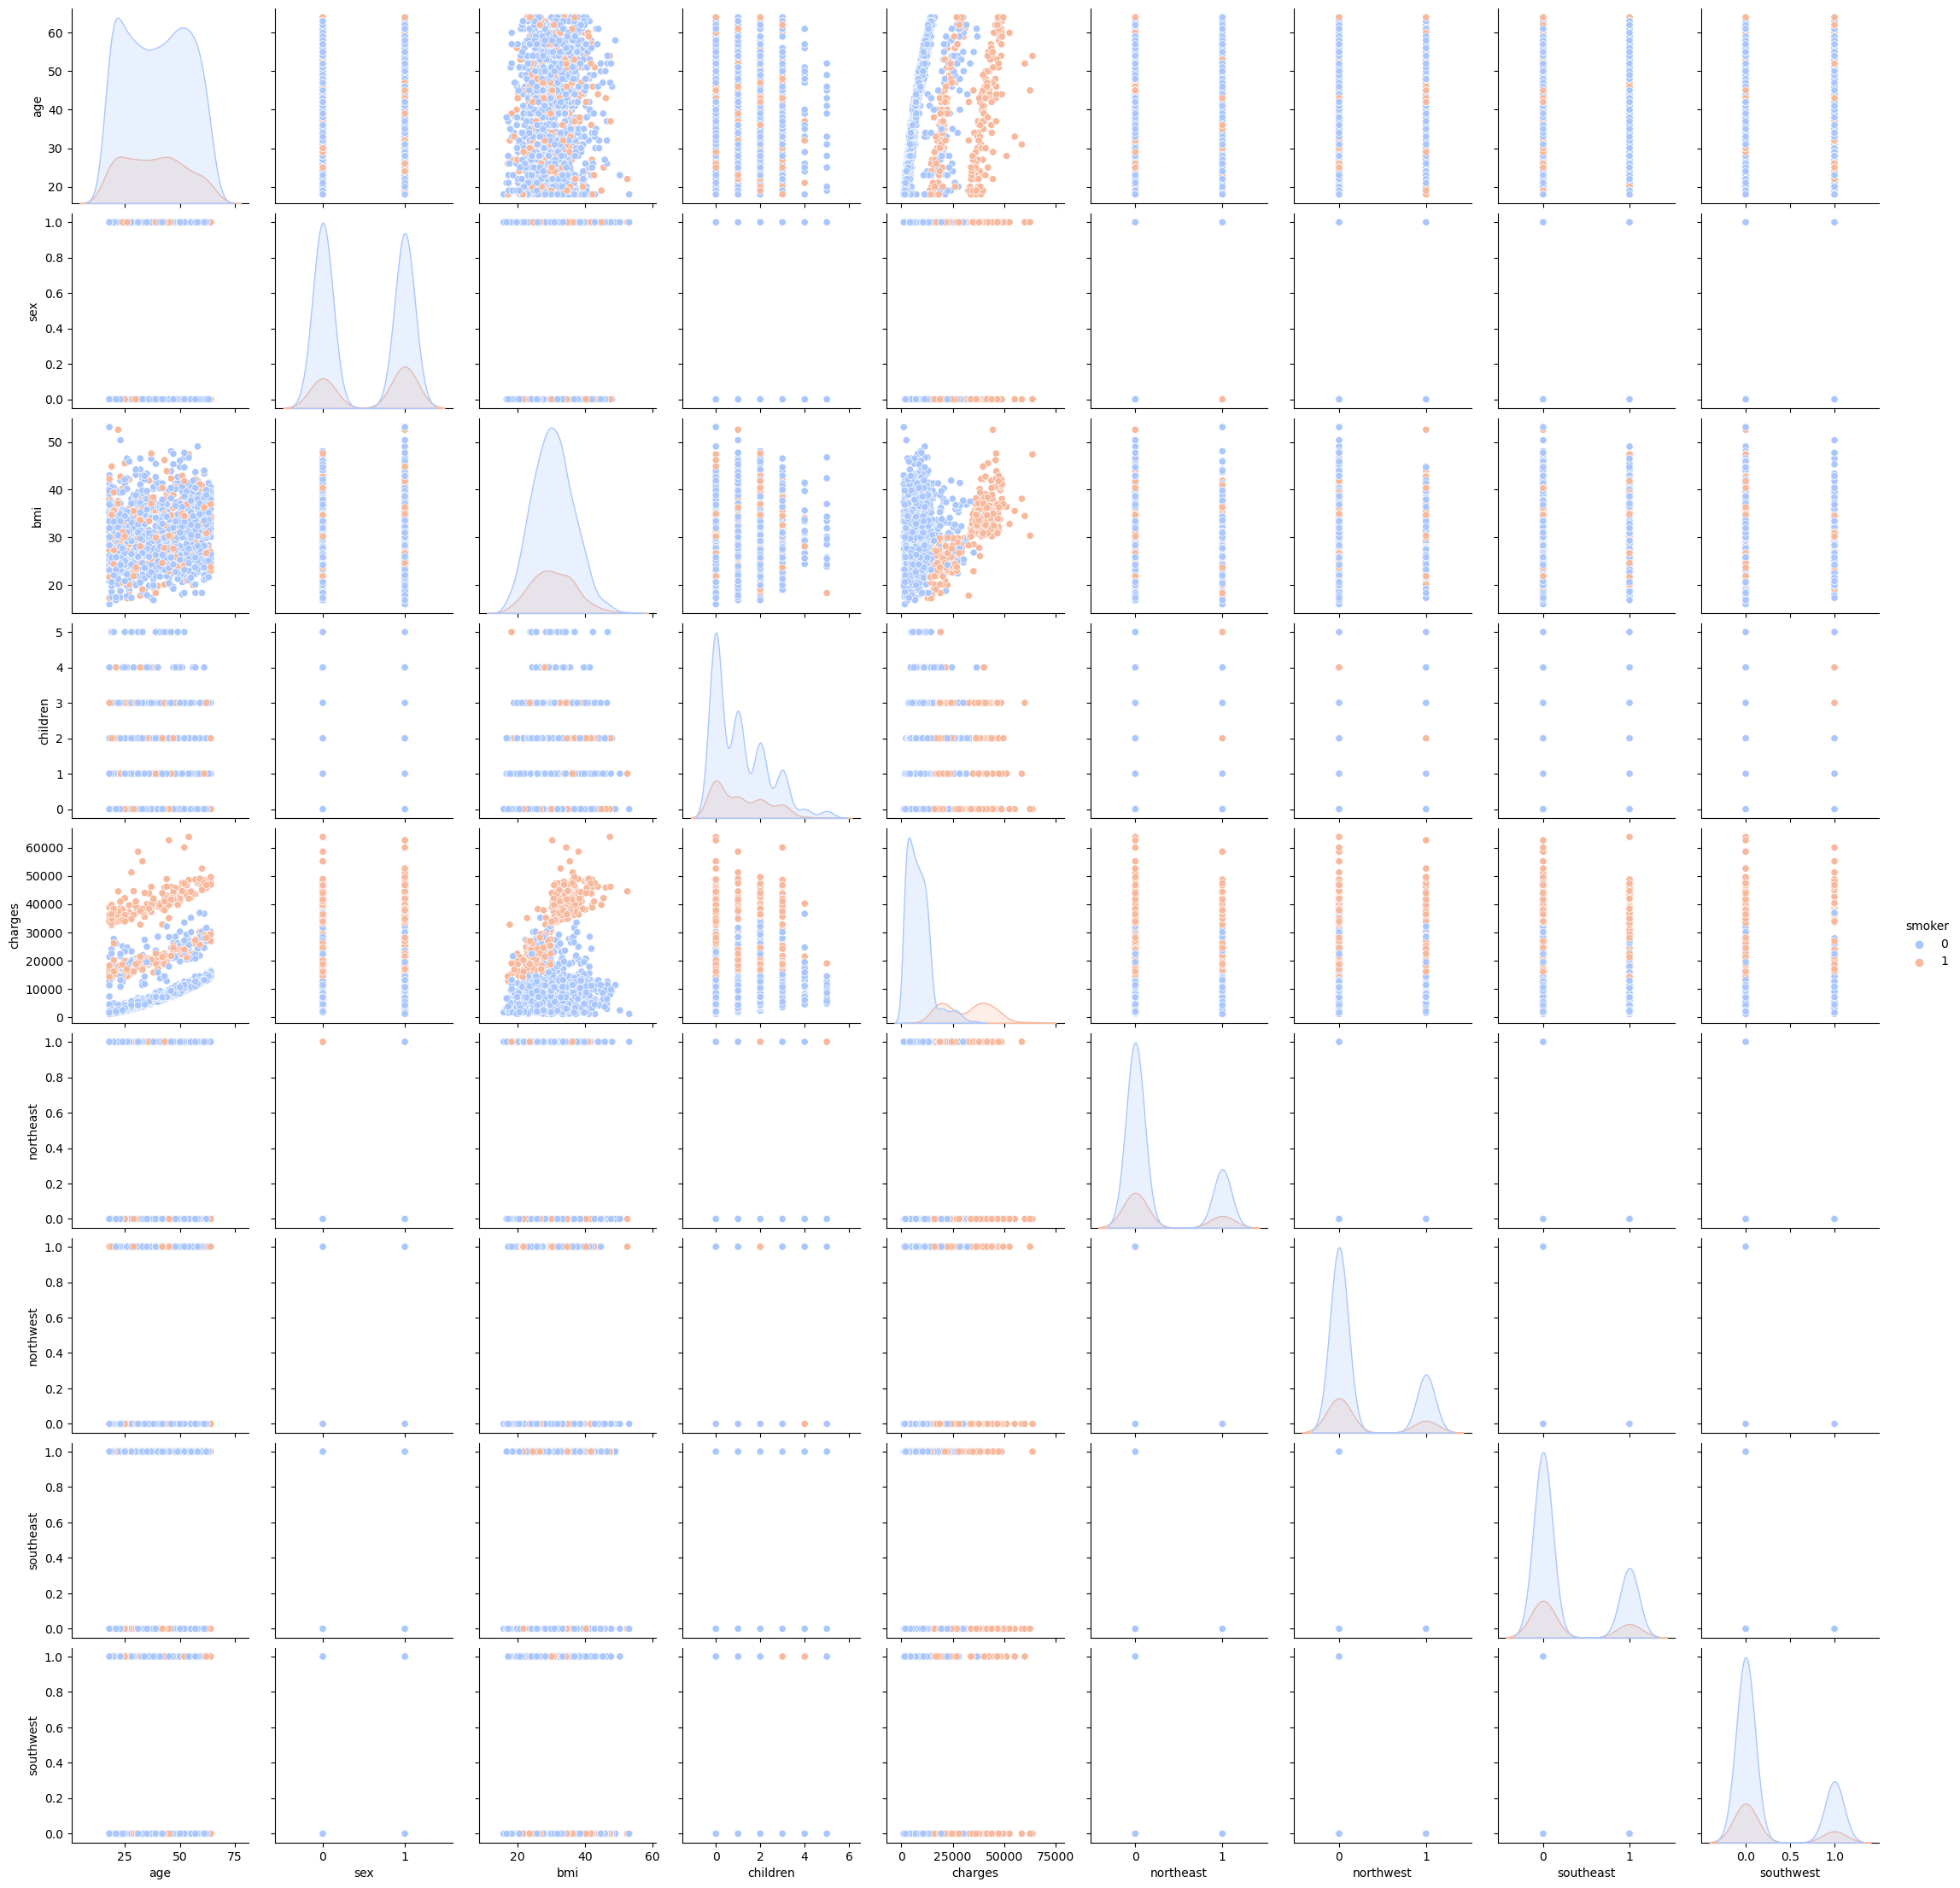

In [65]:
sns.pairplot(df, hue="smoker", palette="coolwarm")

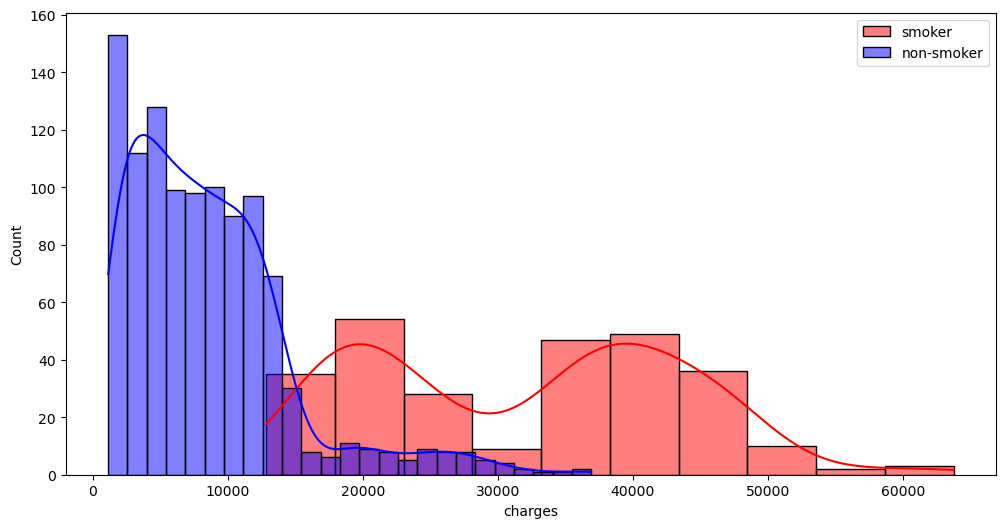

In [66]:
# Deux histogrammes pour comparer les charges des fumeurs et des non-fumeurs
plt.figure(figsize=(12, 6))
sns.histplot(df[df["smoker"] == 1]["charges"], color="red", label="smoker", kde=True)
sns.histplot(df[df["smoker"] == 0]["charges"], color="blue", label="non-smoker", kde=True)
plt.legend()
plt.show()

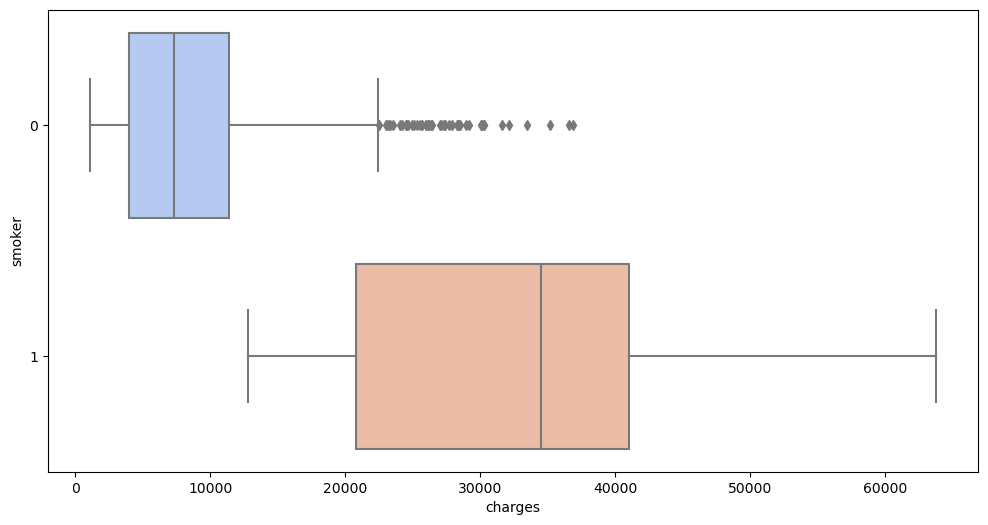

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="charges", y="smoker", data=df, palette="coolwarm", orient="h")
plt.show()

Les fumeurs ont tendance à avoir des charges plus importantes. Est-ce corrélé à d'autres variables ?

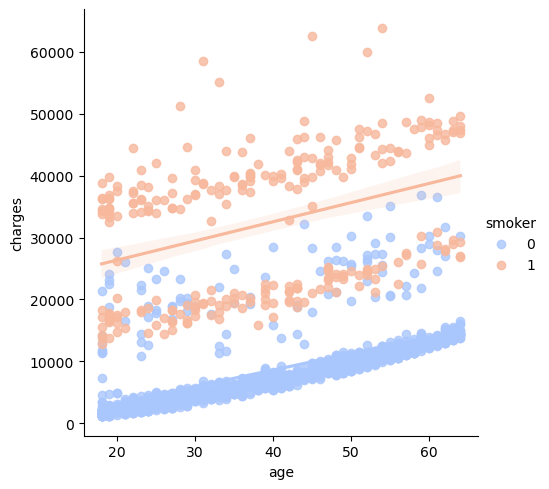

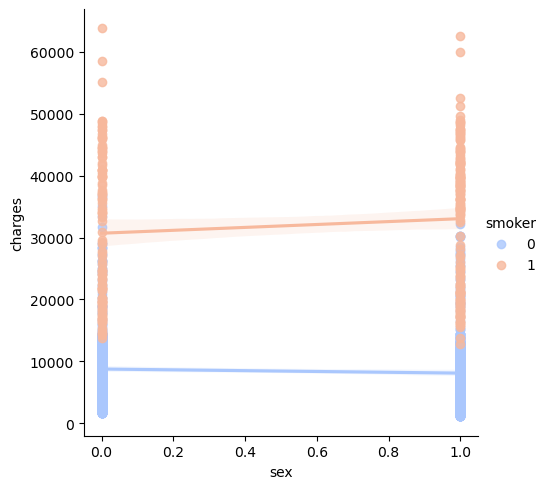

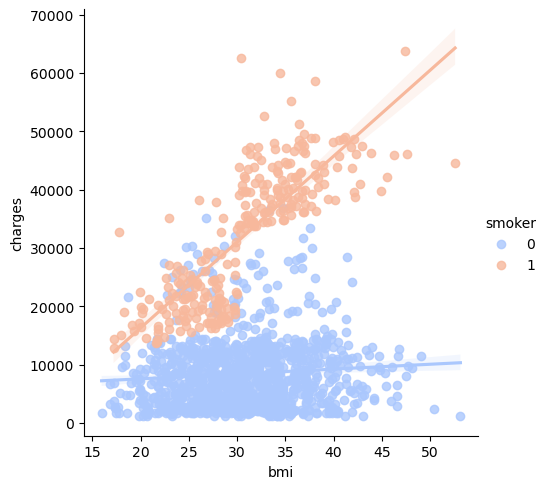

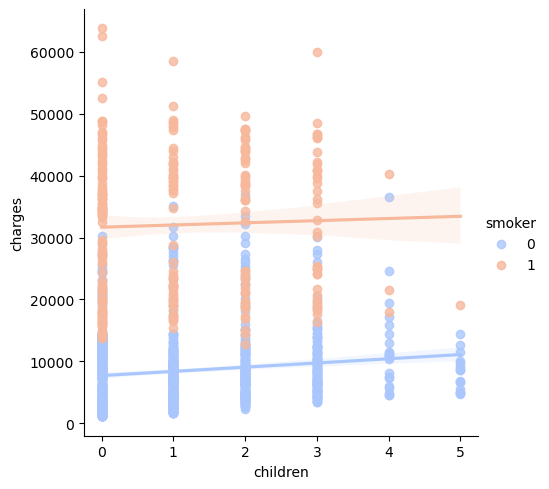

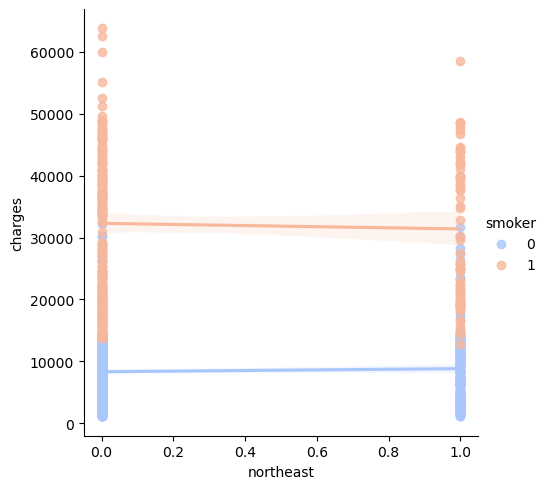

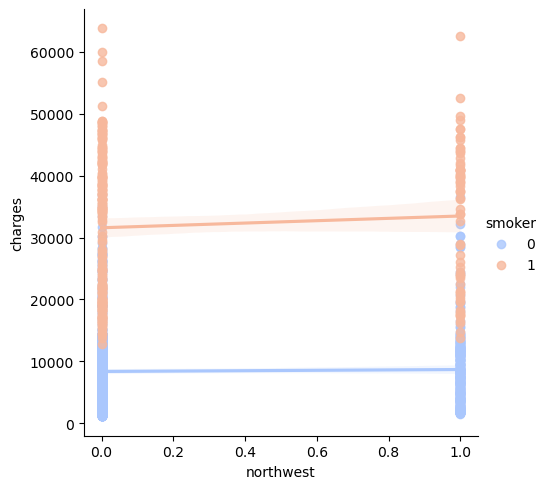

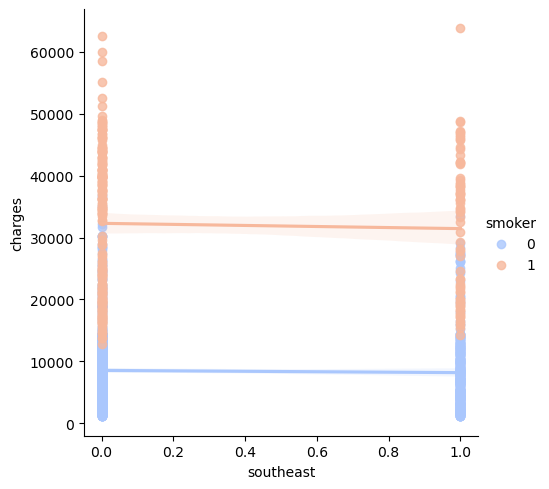

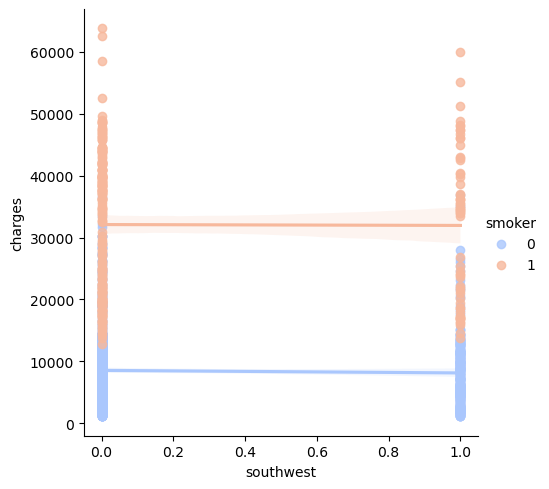

In [68]:
for col in df.columns:
    if col != "charges" and col != "smoker":
        sns.lmplot(x=col, y="charges", data=df, hue="smoker", palette="coolwarm")

On remarque que les fumeurs ont des charges plus élévés sans prendre en compte d'autres variables. Cependant, en prenant en compte l'IMC, on remarque que les fumeurs ont des charges beaucoup plus élevés que les non fumeurs pour un même IMC. Cela peut être dû à d'autres problèmes de santé liés au tabac.

On remarque également que la différence de charges entre un fumeur et un non-fumeur du même âge est plus importante pour les personnes âgées. Cela peut être dû à une plus grande durée d'exposition au tabac.

#### Etude du lien tabac - Age

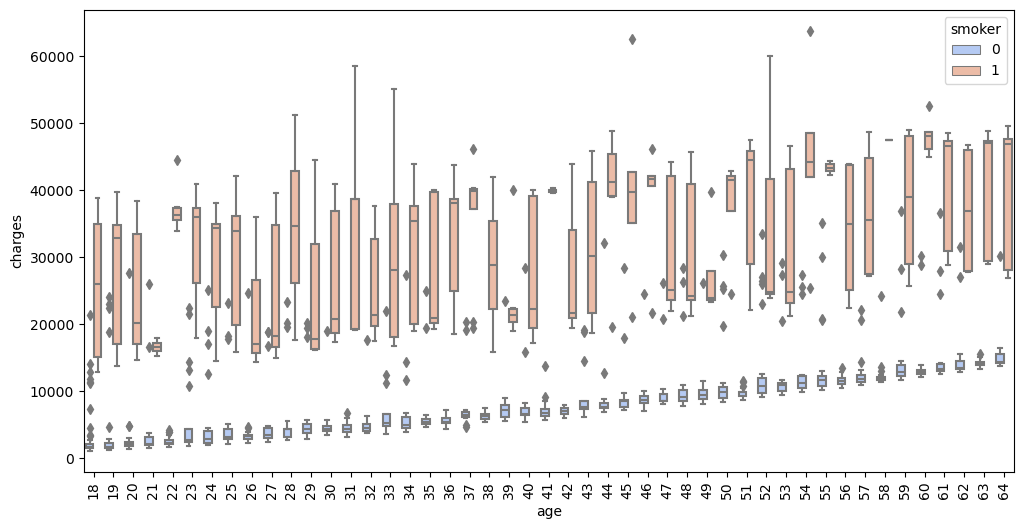

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="age", y="charges", data=df, hue="smoker", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

On remarque que les non-fumeurs ont très peu de différence de charges entre eux pour un même âge, contrairement aux fumeurs qui ont des charges très variables.

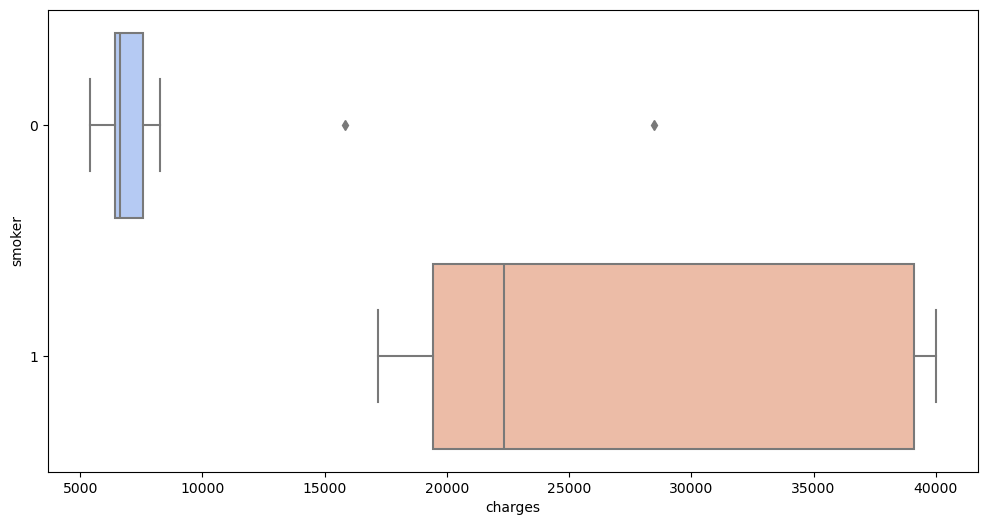

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="charges", y="smoker", data=df[df["age"] == 40], palette="coolwarm", orient="h")
plt.show()

Cela nous confirme que l'écart de charges entre fumeurs et non-fumeurs est dû au tabac et non à d'autres variables et que les non-fumeurs ont des charges plus faibles. Les valeurs aberrantes peuvent-être dû à des accidents ou des maladies.

#### Etude du lien entre le tabac et l'IMC

<Axes: xlabel='bmi', ylabel='charges'>

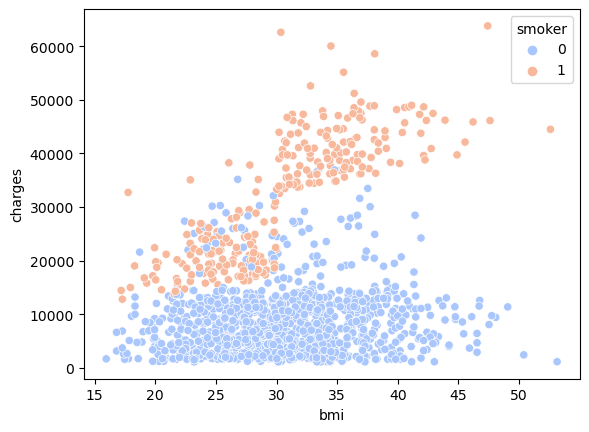

In [71]:
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", palette="coolwarm")

On remarque que l'IMC et le tabac ensemble permettent d'expliquer les charges les plus élevées. Les fumeurs ont des charges plus élevées que les non-fumeurs pour un même IMC. Cela peut être dû à d'autres problèmes de santé liés au tabac.

#### Etude multivariée

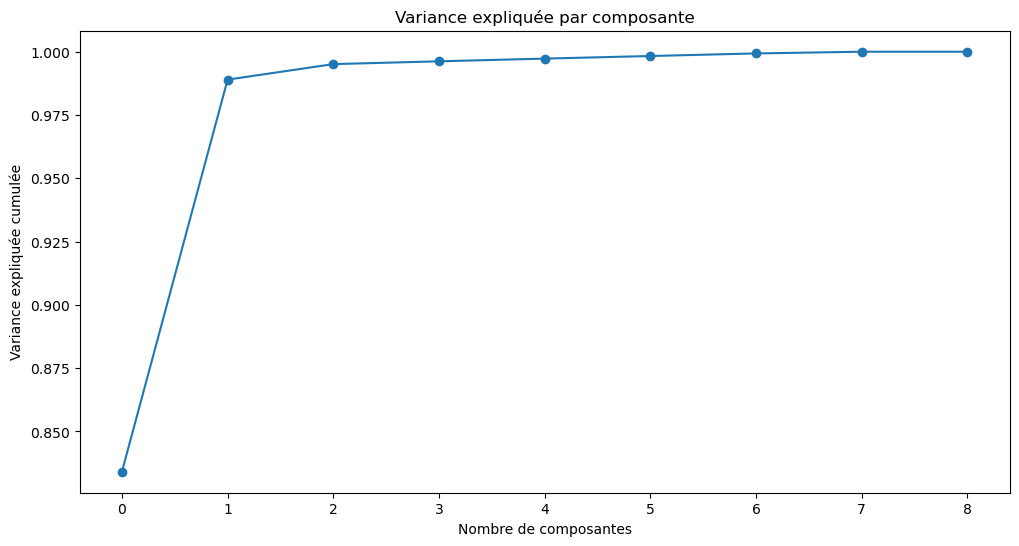

In [80]:
# ACP
from sklearn.decomposition import PCA

pca = PCA()
X = df.drop("charges", axis=1)
y = df["charges"]
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance_cum = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))
plt.title("Variance expliquée par composante")
plt.plot(explained_variance_cum, marker="o")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.show()

3 composantes expliques la majorité de la variance des charges : le tabac, l'IMC et l'âge.

#### Bonus : Etude de la variable région

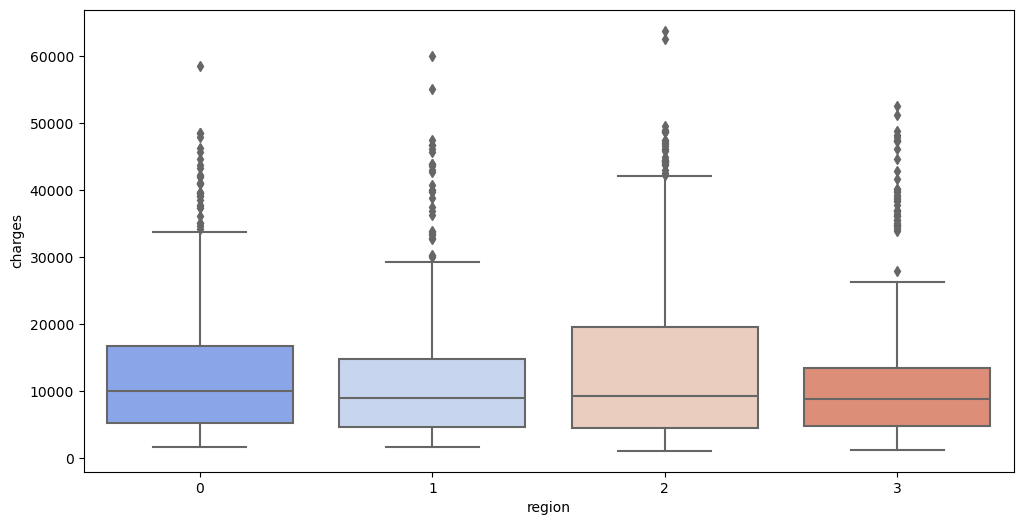

In [91]:
# Etude de l'impact de la région sur les données
df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()
df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["sex"] = le_sex.fit_transform(df["sex"])

# label encoding sur la colonne region
le_region = LabelEncoder()
df["region"] = le_region.fit_transform(df["region"])



# la région a-t-elle un impact sur les charges ?
plt.figure(figsize=(12, 6))
sns.boxplot(x="region", y="charges", data=df, palette="coolwarm")
plt.show()

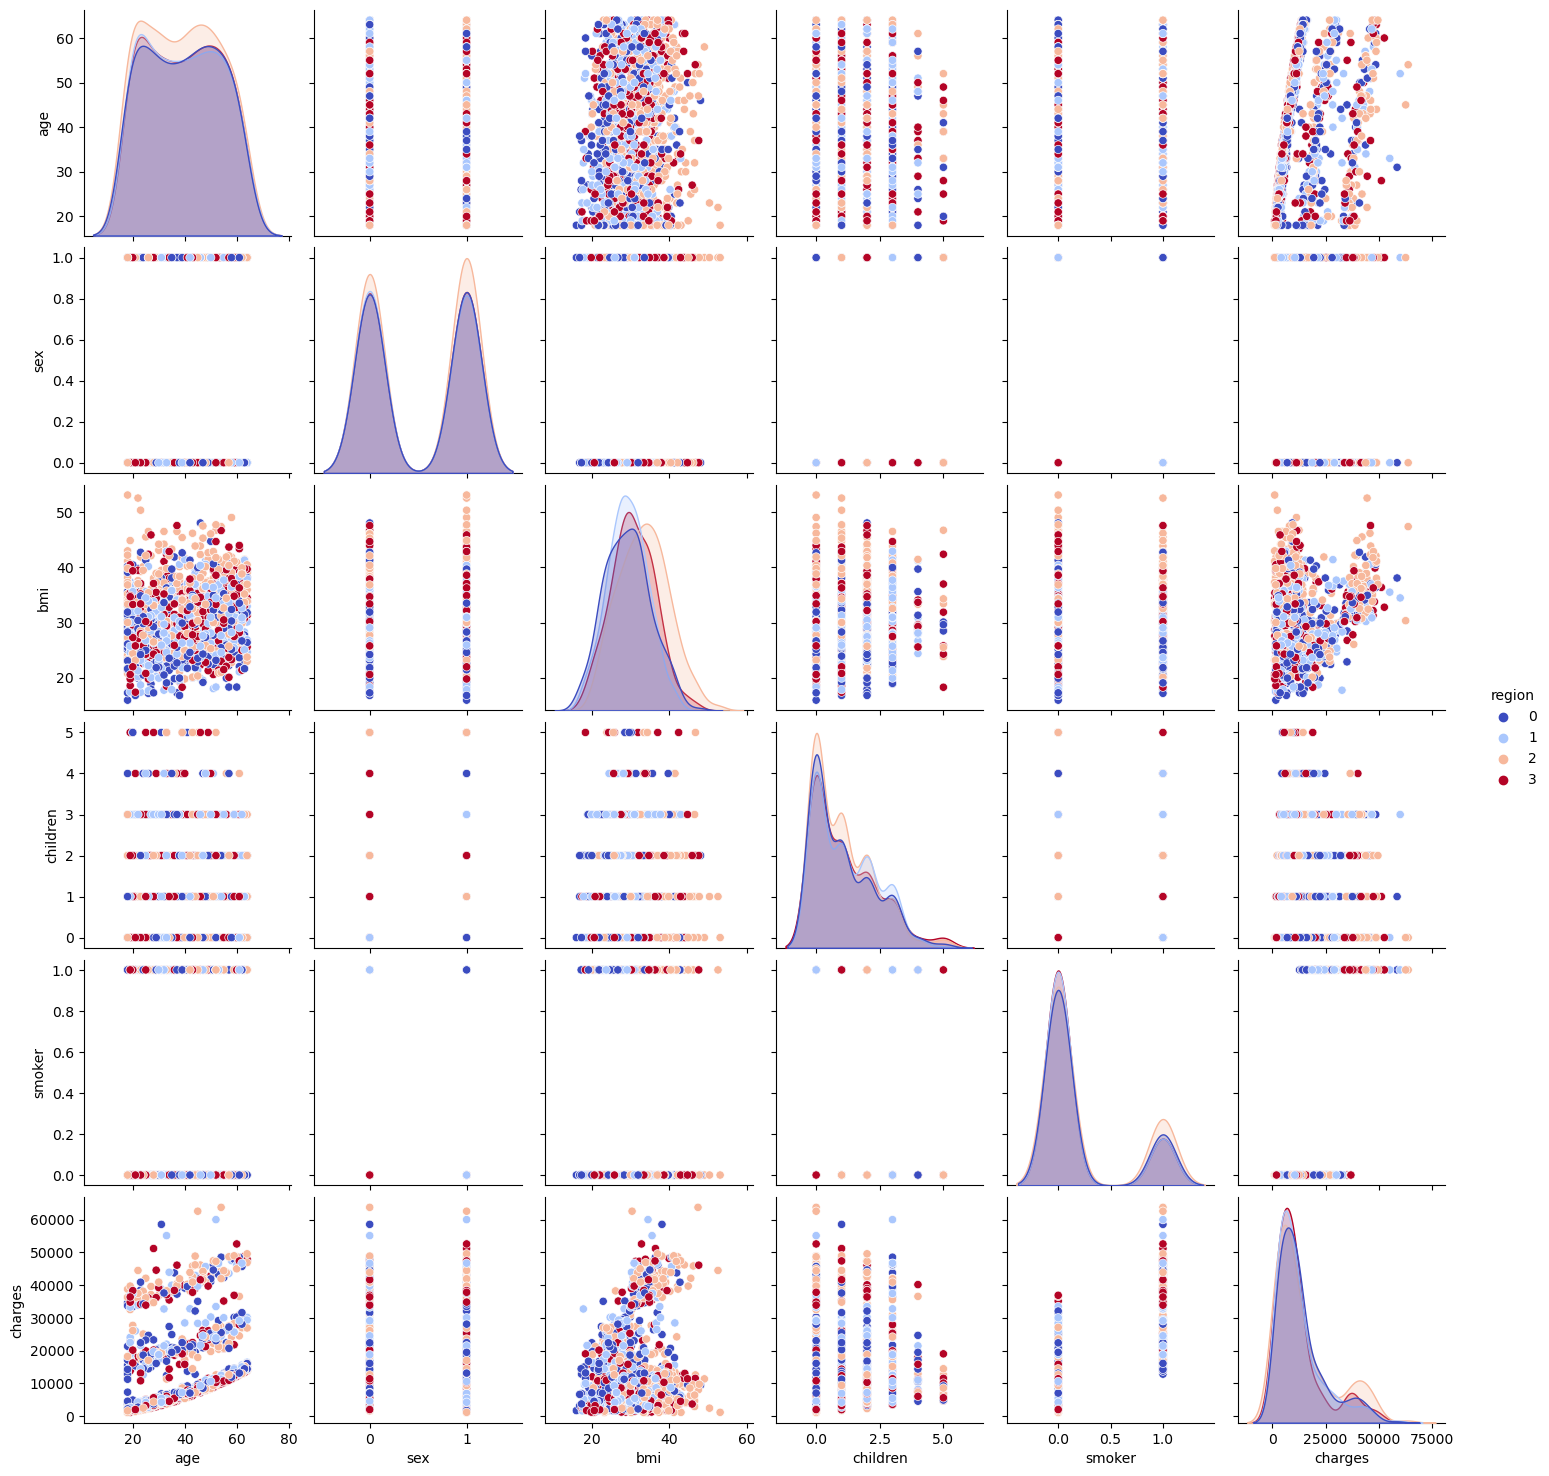

In [92]:
sns.pairplot(df, hue="region", palette="coolwarm")

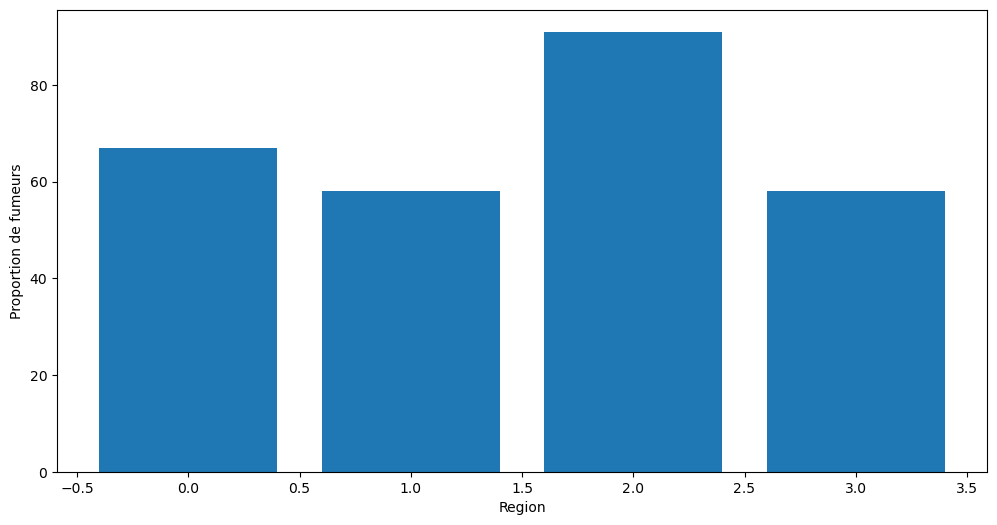

In [95]:
# Proportion de fumeurs par région
dict_fumeurs = {}
for region in df["region"].unique():
    dict_fumeurs[region] = df[df["region"] == region]["smoker"].sum()
    
plt.figure(figsize=(12, 6))
plt.bar(dict_fumeurs.keys(), dict_fumeurs.values())
plt.xlabel("Region")
plt.ylabel("Nombre de fumeurs")
plt.show()

Il y a plus de fumeurs dans la région 2, sans que cela soit significatif.

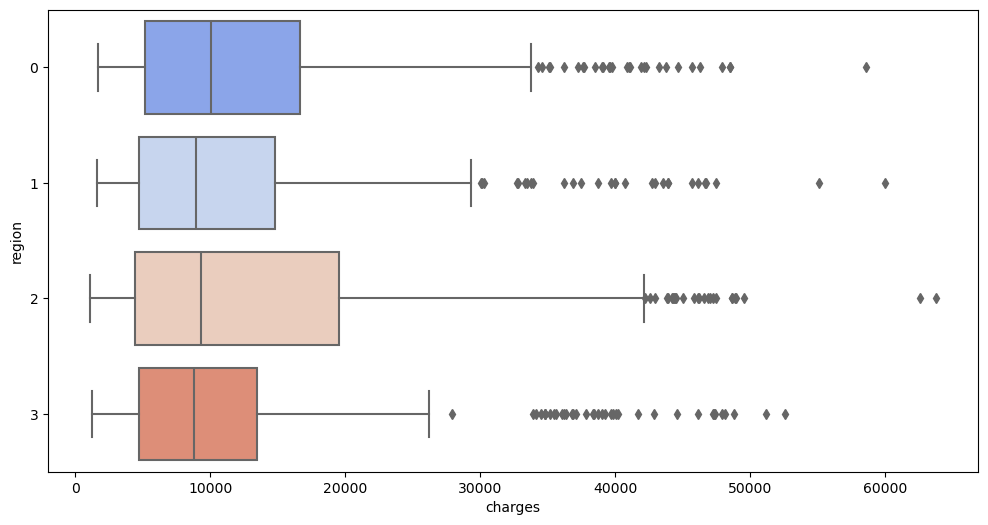

In [96]:
# Les charges sont-elles corrélées à la région ?
plt.figure(figsize=(12, 6))
sns.boxplot(x="charges", y="region", data=df, palette="coolwarm", orient="h")
plt.show()

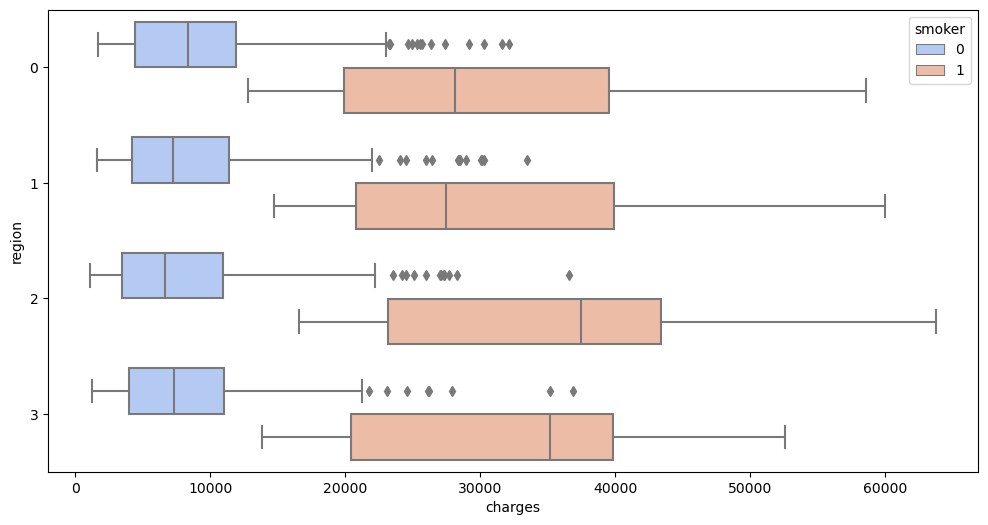

In [97]:
# Les charges et le tabagisme sont-elles corrélées à la région ?
plt.figure(figsize=(12, 6))
sns.boxplot(x="charges", y="region", data=df, hue="smoker", palette="coolwarm", orient="h")
plt.show()

les régions ne semblent pas avoir d'impact sur les charges.